In [ ]:
from notebooks import *

# TODO
- [x] Show breakdown by license
    - [Later] Decide how to handle NoDerivs recordings
- [ ] Fix downloaded='data', which is now empty but recently wasn't... (and the script on the right still counts right...)
- [ ] Show breakdown by downloaded vs. not

In [ ]:
# Query and save recent metadata
#   - Total num recs: https://www.xeno-canto.org/explore?query=
#   - Make query strings: https://www.xeno-canto.org/explore?query=q:E
#   - Query docs: https://www.xeno-canto.org/help/search
# df = xc.query_and_save('since:30')  # days

.

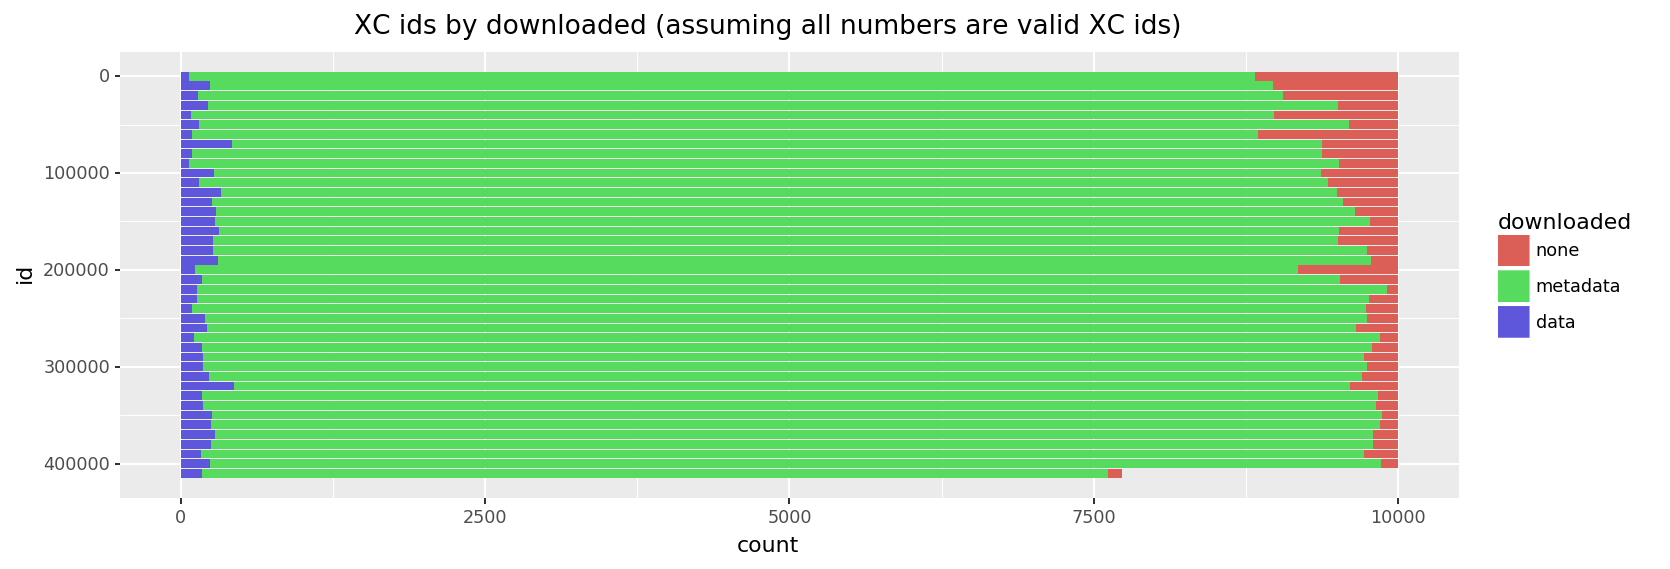

<ggplot: (-9223372036582808267)>

In [ ]:
bin_size = 10_000
bin_f = lambda x: (x // bin_size) * bin_size
(
    pd.concat(axis=0, objs=[
        DF({'downloaded': 'data',     'count': bin_f(xc.metadata[lambda df: df.downloaded].id).value_counts()}),
        DF({'downloaded': 'metadata', 'count': bin_f(xc.metadata[lambda df: ~df.downloaded].id).value_counts()}),
        DF({'downloaded': 'none',     'count': bin_f(xc.unsaved_ids).value_counts()}),
    ])
    .reset_index().rename(columns={'index': 'id'})
    .pipe(df_ordered_cat, downloaded=['none', 'metadata', 'data'])
    .pipe(ggplot, aes(x='id', y='count', fill='downloaded'))
    + geom_bar(stat='identity', width=bin_size*.9)
    + coord_flip()
    + scale_x_reverse()
    + theme_figsize('inline_short')
    + ggtitle('XC ids by downloaded (assuming all numbers are valid XC ids)')
)

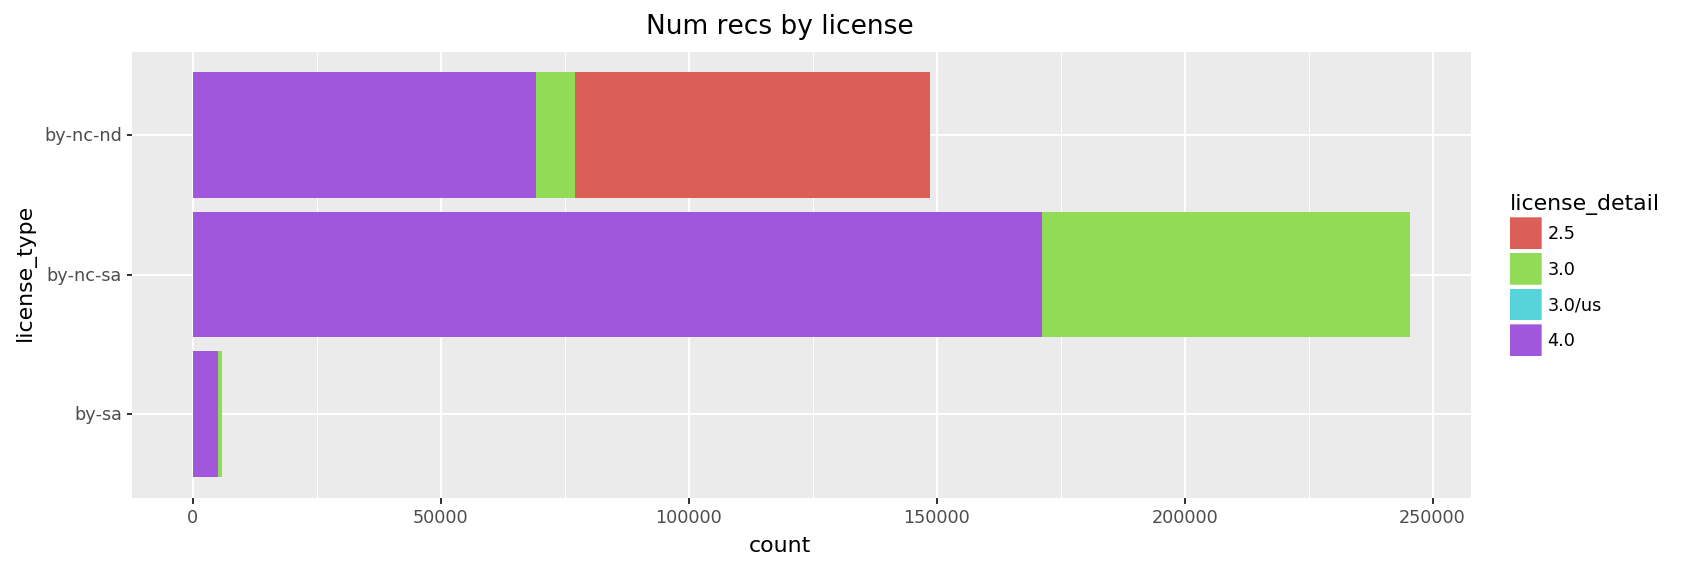

<ggplot: (291676606)>

In [ ]:
(xc.metadata
    .pipe(df_reverse_cat, 'license_type')
    .pipe(ggplot, aes(x='license_type', fill='license_detail'))
    + geom_bar()
    + coord_flip()
    + ggtitle('Num recs by license')
)

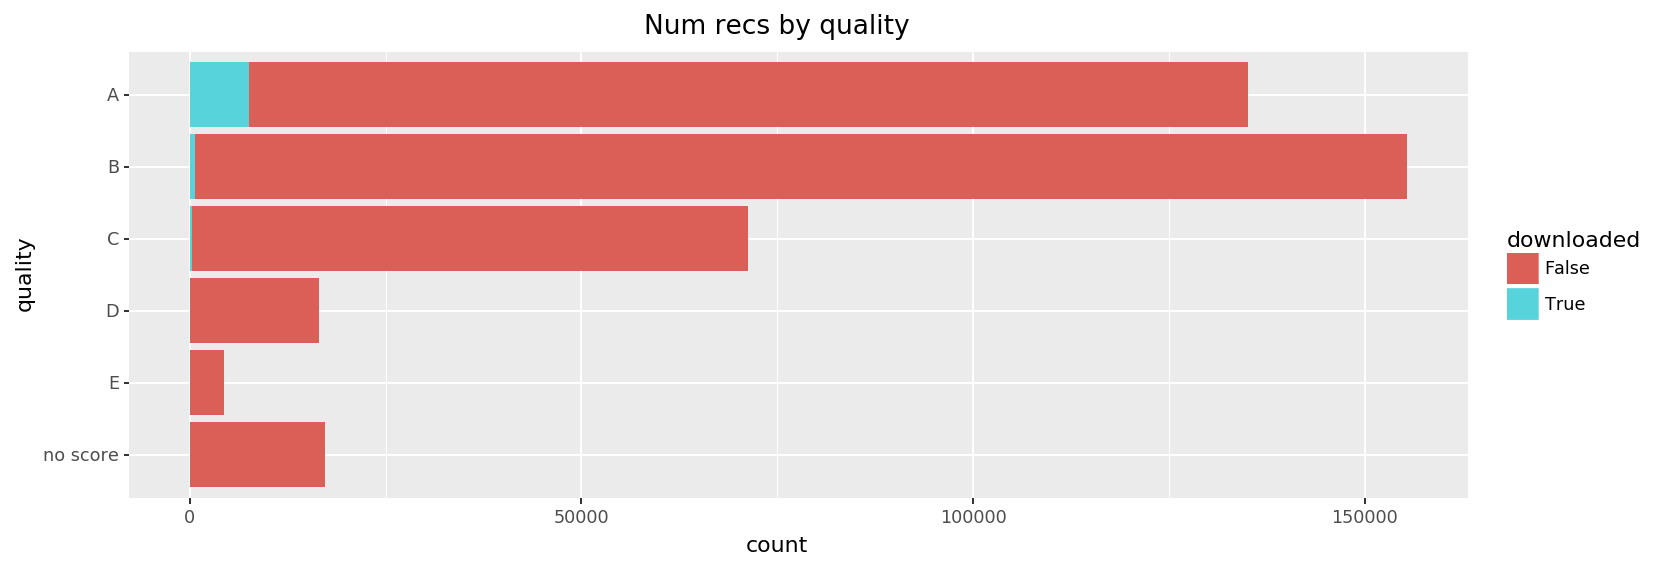

<ggplot: (-9223372036548899461)>

In [ ]:
(xc.metadata
    .pipe(df_reverse_cat, 'quality')
    .pipe(ggplot, aes(x='quality', fill='downloaded'))
    + geom_bar()
    + coord_flip()
    + ggtitle('Num recs by quality')
)

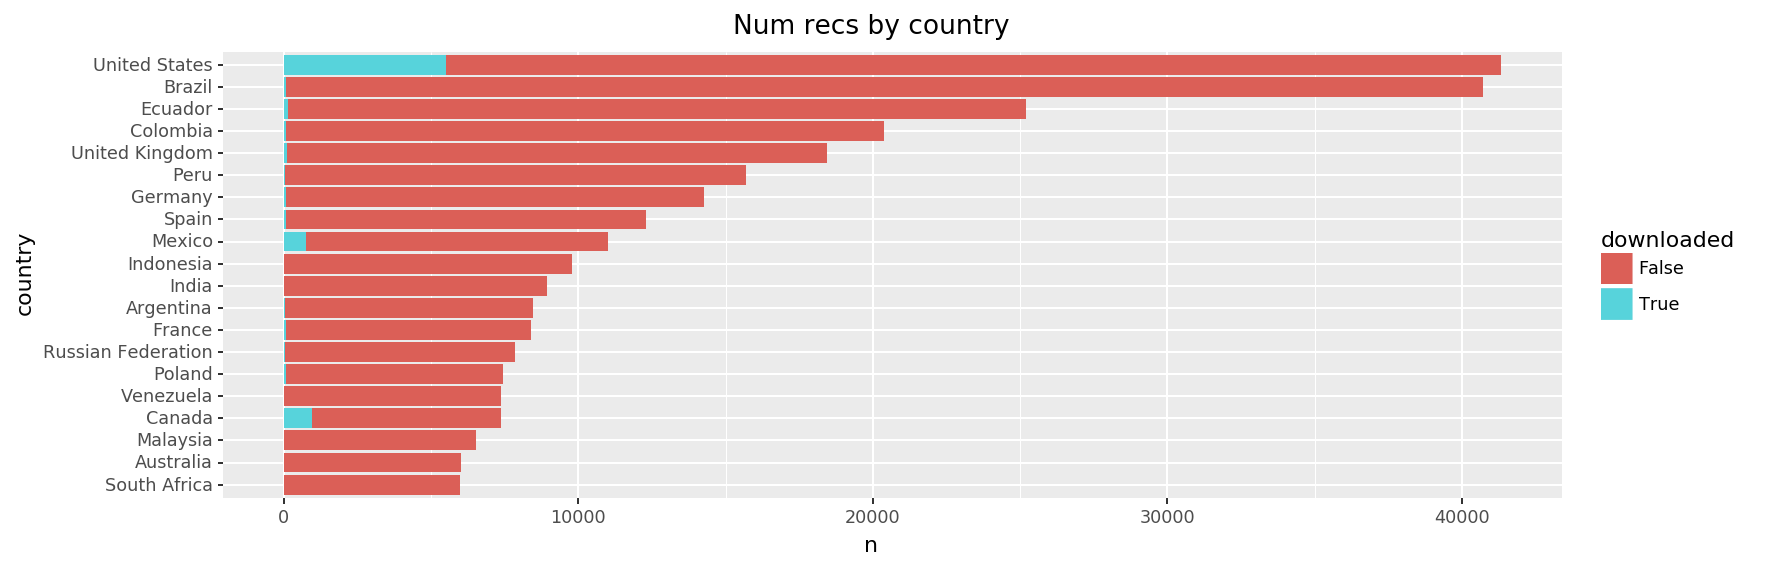

<ggplot: (316488133)>

In [ ]:
(xc.metadata
    .assign(n=1).groupby(['country', 'downloaded'])['n'].sum().reset_index()
    .pipe(df_ordered_cat, country=lambda df: df.groupby('country')['n'].sum().reset_index().sort_values('n').country.unique())
    .sort_values('country')[-int(20 * 2):]  # Inflate for downloaded=(True|False)
    .pipe(df_remove_unused_categories)
    .pipe(ggplot, aes(x='country', y='n', fill='downloaded'))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme_figsize('inline_short')
    + ggtitle('Num recs by country')
)

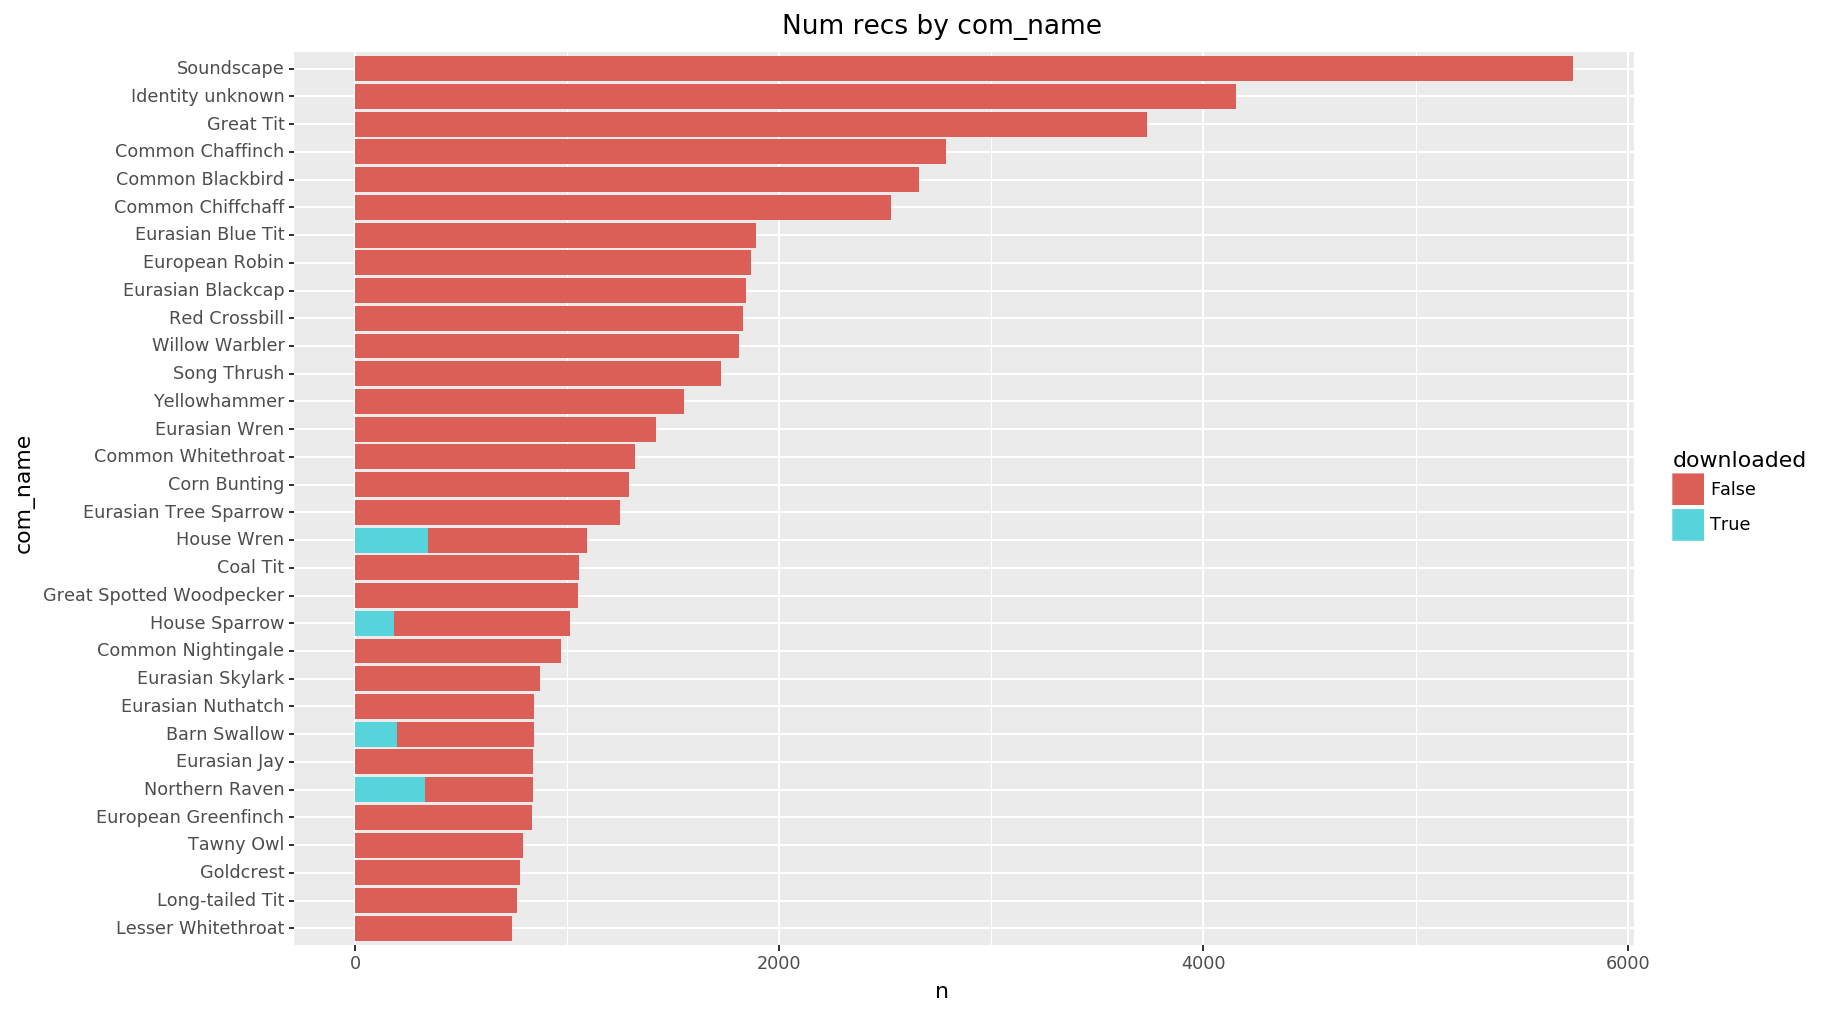

<ggplot: (294541779)>

In [ ]:
(xc.metadata
    .assign(n=1).groupby(['com_name', 'downloaded'])['n'].sum().reset_index()
    .pipe(df_ordered_cat, com_name=lambda df: df.groupby('com_name')['n'].sum().reset_index().sort_values('n').com_name.unique())
    .sort_values('com_name')[-int(30 * 1.2):]  # Inflate for downloaded=(True|False)
    .pipe(df_remove_unused_categories)
    .pipe(ggplot, aes(x='com_name', y='n', fill='downloaded'))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme_figsize('inline')
    + ggtitle('Num recs by com_name')
)

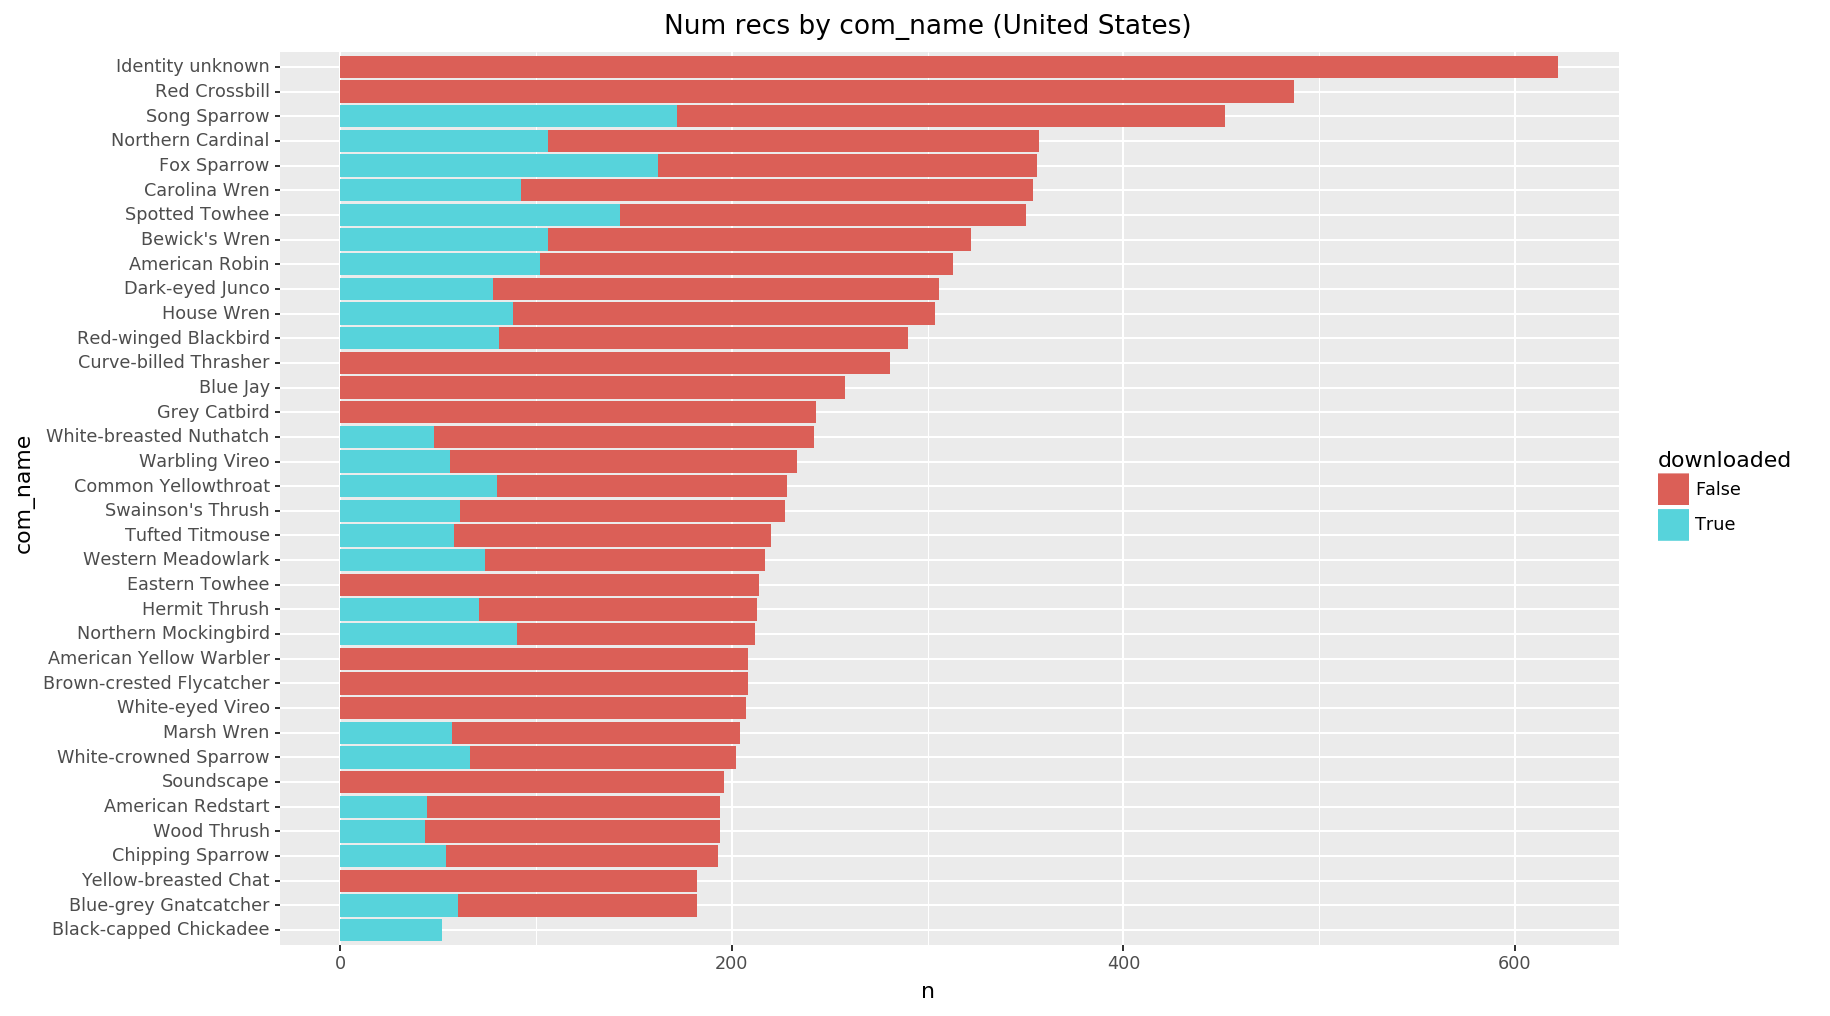

<ggplot: (-9223372036549637723)>

In [ ]:
(xc.metadata
    [lambda df: df.country == 'United States']
    .assign(n=1).groupby(['com_name', 'downloaded'])['n'].sum().reset_index()
    .pipe(df_ordered_cat, com_name=lambda df: df.groupby('com_name')['n'].sum().reset_index().sort_values('n').com_name.unique())
    .sort_values('com_name')[-int(30 * 2):]  # Inflate for downloaded=(True|False)
    .pipe(df_remove_unused_categories)
    .pipe(ggplot, aes(x='com_name', y='n', fill='downloaded'))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme_figsize('inline')
    + ggtitle('Num recs by com_name (United States)')
)

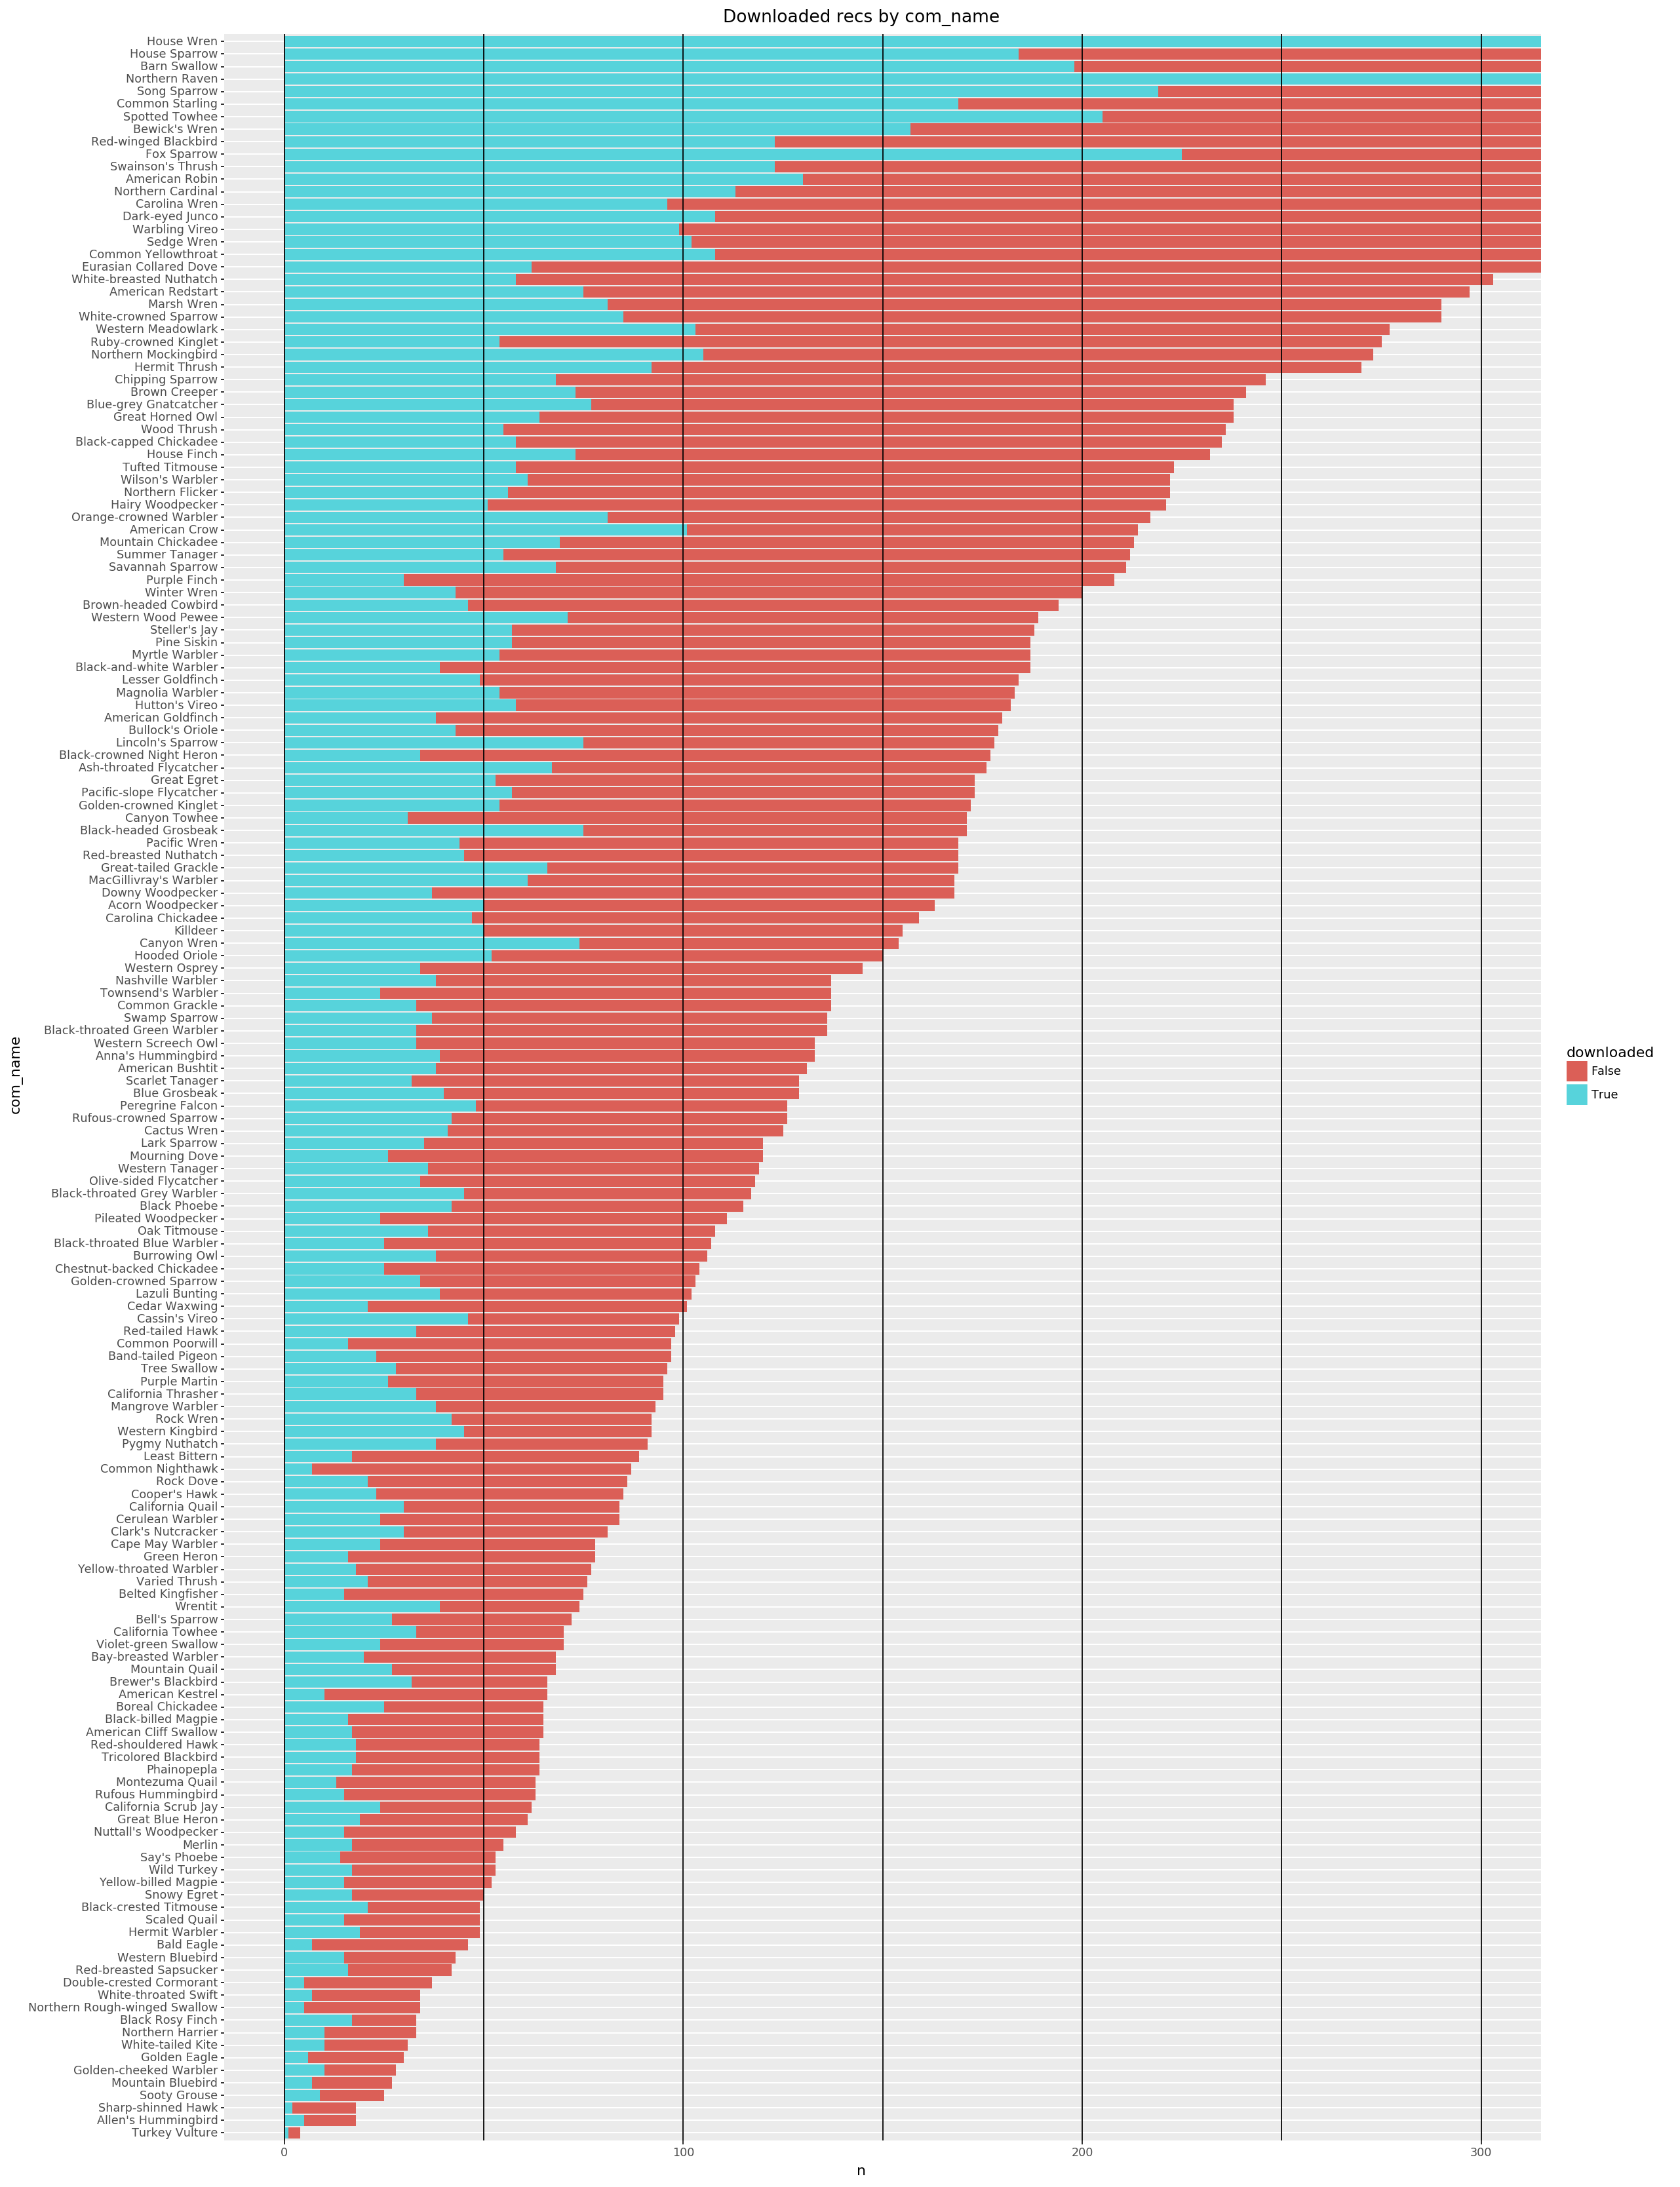

<ggplot: (-9223372036542711864)>

In [ ]:
(xc.metadata
    .pipe(df_cat_to_str)  # Removing _all_ cats (not just com_name) speeds up the groupby by ~2x [why?]
    .groupby(['com_name']).filter(lambda g: True in g.downloaded.values)  # Exclude com_name's with no downloads
    .assign(n=1).groupby(['com_name', 'downloaded'])['n'].sum().reset_index()
    .pipe(df_ordered_cat, com_name=lambda df: df.groupby('com_name')['n'].sum().reset_index().sort_values('n').com_name.unique())
    .sort_values('com_name')
    [:1000]  # Plot "everything", but stop at some point
    .pipe(df_remove_unused_categories)
    .pipe(ggplot, aes(x='com_name', y='n', fill='downloaded'))
    + geom_bar(stat='identity')
    + plotnine.layer.Layers([
        geom_hline(yintercept=yintercept, color='black')
        for yintercept in range(0, 1000, 50)
    ])
    # Zoom the x-axis in on the downloaded fraction
    # + coord_flip()
    # + coord_flip(ylim=(0, 100))
    # + coord_flip(ylim=(0, 200))
    + coord_flip(ylim=(0, 300))
    # Figsize to fit the y-axis (com_name)
    # + theme_figsize(width=12, aspect_ratio=1/1)  # square
    + theme_figsize(width=18, aspect_ratio=1.6/1)
    # + theme_figsize(width=12*1, aspect_ratio=8/3)  # half
    # + theme_figsize(width=12*2, aspect_ratio=8/6)  # full
    + ggtitle('Downloaded recs by com_name')
)

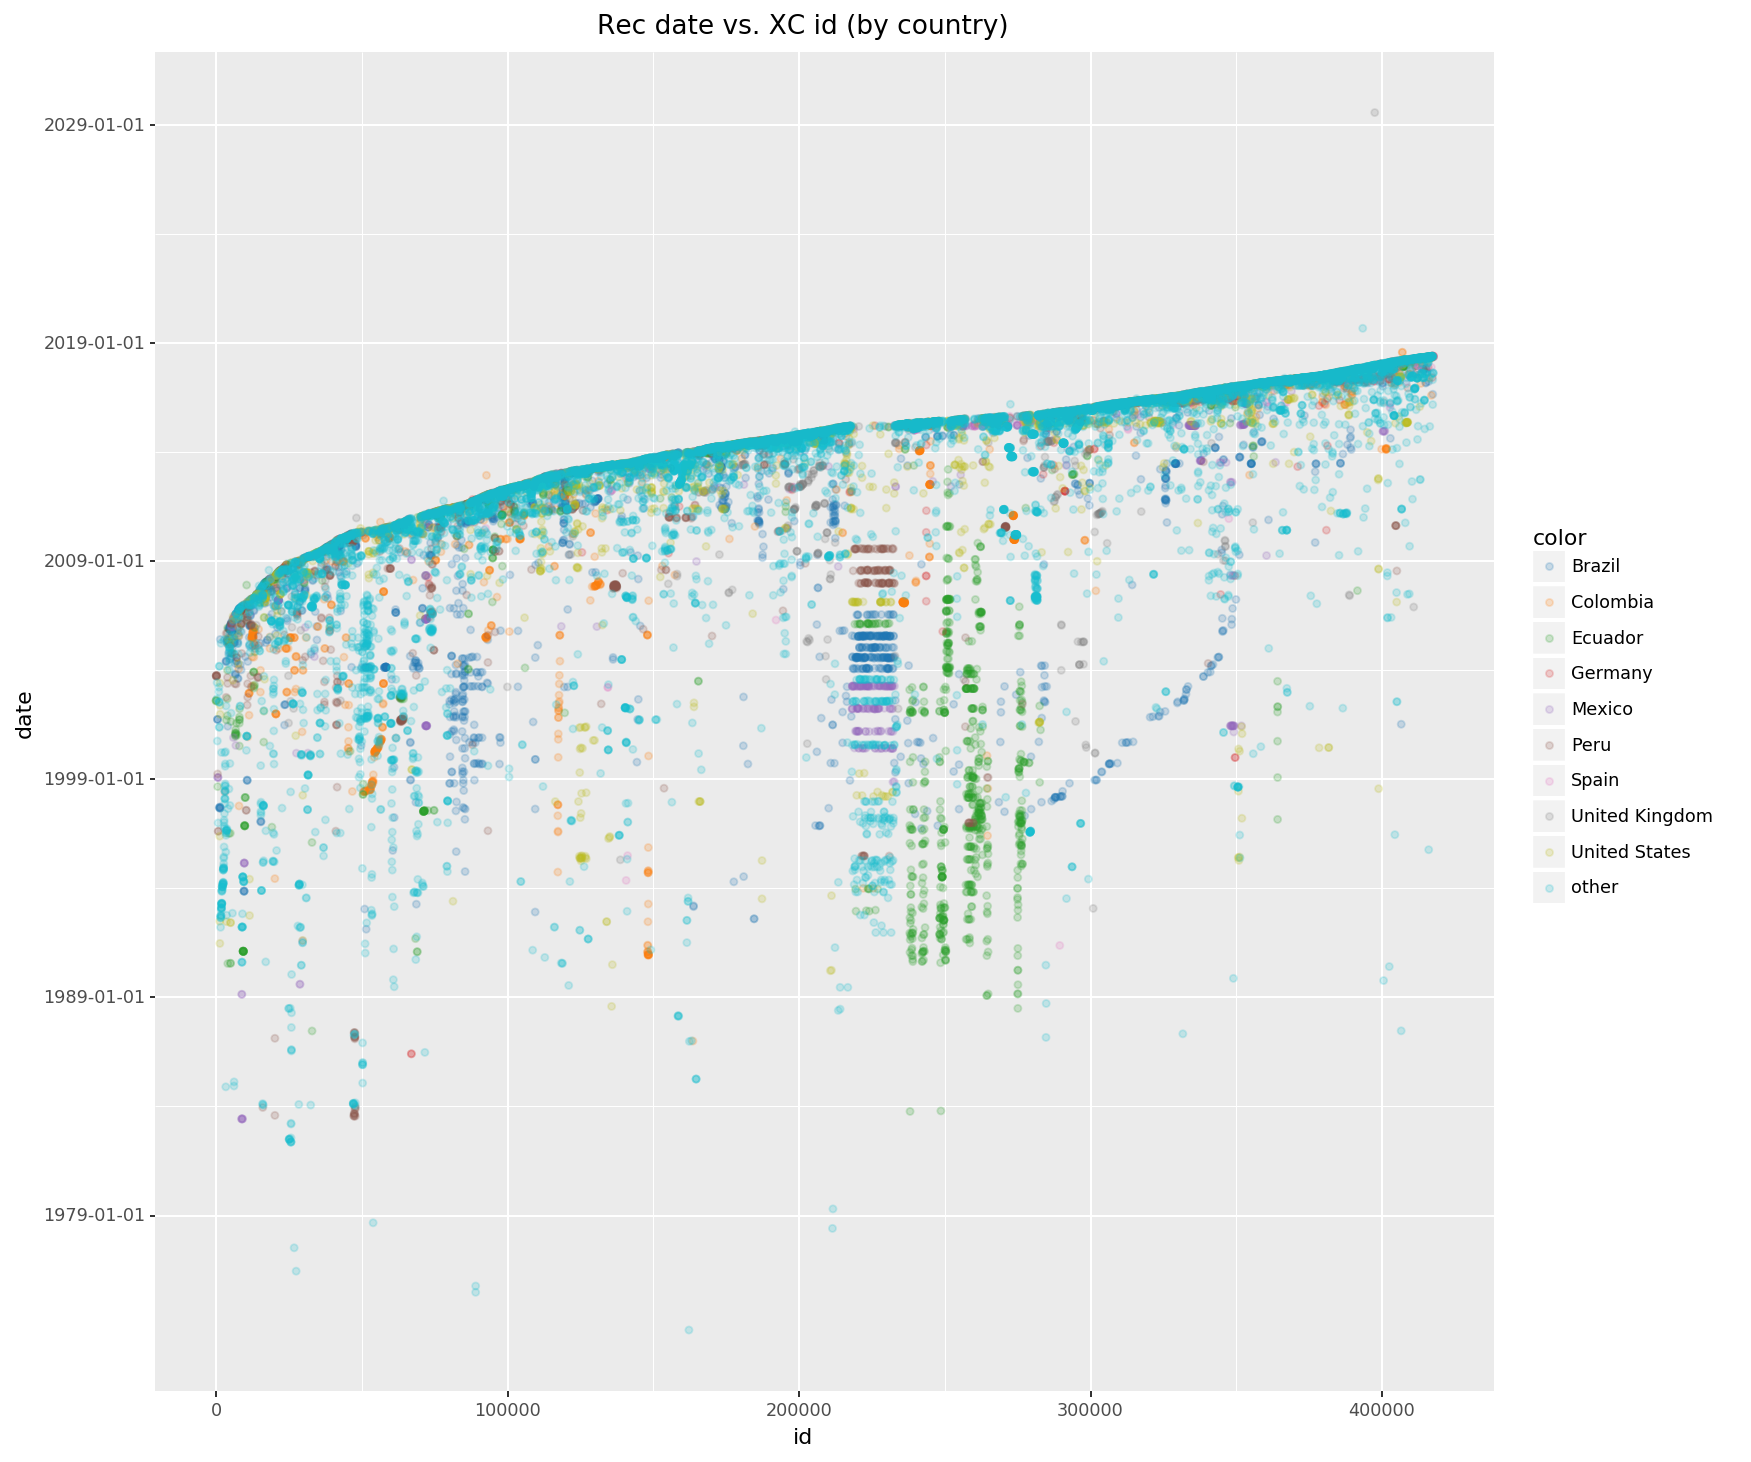

<ggplot: (-9223372036546632823)>

In [ ]:
(xc.metadata
    .fillna({'date': pd.to_datetime('2000-01-01')}) # plotnine barfs on NaT
    .sample(20_000, random_state=0)
    .assign(color=lambda df: df.country.map(lambda x: x if x in [
        'United States',
        'Brazil',
        'Ecuador',
        'Colombia',
        'United Kingdom',
        'Peru',
        'Germany',
        'Spain',
        'Mexico',
        # 'Indonesia',
        # 'India',
    ] else 'other'))
    .pipe(ggplot, aes(x='id', y='date', color='color'))
    + geom_point(alpha=.2)
    + scale_color_cmap_d(mpl.cm.tab10)
    + theme_figsize('square')
    + ggtitle('Rec date vs. XC id (by country)')
)

In [ ]:
display(
    df_summary(xc.metadata).T,
    (xc.metadata
        .sample(100, random_state=0)
        # .sort_values('species_code')
        .sort_values('id')
    ),
)

,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
downloaded,bool,9631380,399859,399859,2,NaN,NaN,False,False,False,False,True
species,category,20896029,399859,382669,9442,NaN,NaN,None,SAKI,RBPE,BLUE,PAWE
id,int64,11196052,399859,399859,399859,211675.929,120073.448,1,108446,213049,315602,417733
sci_name,category,27011599,399859,399859,9821,NaN,NaN,Zimmerius improbus,Todiramphus sanctus,Cyclarhis gujanensis,Luscinia svecica,Anomalospiza imberbis
com_name,category,31733860,399859,399859,9822,NaN,NaN,Specious Tyrannulet,Sacred Kingfisher,Rufous-browed Peppershrike,Bluethroat,Cuckoo-finch
subspecies,object,20380137,399859,399859,8260,NaN,NaN,,,,,Х Phylloscopus examinandus
recordist,object,25928129,399859,399859,5263,NaN,NaN,Alejandro Pinto-Gómez,Fernando Igor de Godoy,Lynette Rudman,Peter Boesman,高建云(Jianyun Gao)
country,object,22903534,399859,399859,191,NaN,NaN,Afghanistan,Colombia,Japan,Spain,mexico
locality,object,36967741,399859,399859,47622,NaN,NaN,,"Esmeraldas: Playa de Oro, village and vicinity, Río Santiago","Mgahinga National Park, Kisoro","Ryedale District (near Helperthorpe), North Yorkshire, England","﻿Santuario Otun-Quimbaya, Pereira, Tolima"


,downloaded,species,id,sci_name,com_name,subspecies,recordist,country,locality,lat,lng,type,quality,date,time,license_type,license_detail,license,url,download
398814,False,SOEA,1551,Buteogallus solitarius,Montane Solitary Eagle,,Sjoerd Mayer,Bolivia,"Camp on east slope Cerro Bufete, Chuquisaca",-20.800,-64.30,call,A,1992-03-20 00:00:00,14:00,by-nc-sa,3.0,//creativecommons.org/licenses/by-nc-sa/3.0/,https://www.xeno-canto.org/1551,//www.xeno-canto.org/1551/download
395614,False,WBPU,5029,Iodopleura isabellae,White-browed Purpletuft,paraensis,Nick Athanas,Brazil,"Serra dos Carajás, PA",-6.160,-50.30,song?,B,2006-01-22 00:00:00,16:00,by-nc-sa,3.0,//creativecommons.org/licenses/by-nc-sa/3.0/,https://www.xeno-canto.org/5029,//www.xeno-canto.org/5029/download
394848,False,RBPE,5948,Cyclarhis gujanensis,Rufous-browed Peppershrike,insularis,Richard C. Hoyer,Mexico,Cozumel Island,20.400,-86.90,call,B,2000-11-30 00:00:00,7:00,by-nc-nd,2.5,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/5948,//www.xeno-canto.org/5948/download
394140,False,CTAN,6705,Epinecrophylla fulviventris,Checker-throated Antwren,fulviventris,Nick Athanas,Ecuador,"NW of La Celica, Pichincha",0.267,-79.20,call,A,2001-02-19 00:00:00,09:00,by-nc-sa,3.0,//creativecommons.org/licenses/by-nc-sa/3.0/,https://www.xeno-canto.org/6705,//www.xeno-canto.org/6705/download
394035,False,RBPE,6821,Cyclarhis gujanensis,Rufous-browed Peppershrike,,David Bradley,Costa Rica,Santa Rosa National Park,10.700,-85.50,?,A,2006-05-01 00:00:00,?,by-nc-nd,2.5,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/6821,//www.xeno-canto.org/6821/download
392495,False,SAFI,8493,Sicalis flaveola,Saffron Finch,,Mauricio Cabral Periquito,Brazil,"Praça da Jaqueira, Recife, Pernambuco",-8.040,-34.90,song,no score,2006-10-22 00:00:00,9:00,by-nc-nd,2.5,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/8493,//www.xeno-canto.org/8493/download
391457,False,AMBW,9567,Dendrocolaptes certhia,Amazonian Barred Woodcreeper,concolor,Allen T. Chartier,Brazil,"Fazenda Rancho Grande, Rondonia",-10.300,-62.90,Song,B,1993-11-13 00:00:00,?,by-nc-sa,3.0,//creativecommons.org/licenses/by-nc-sa/3.0/,https://www.xeno-canto.org/9567,//www.xeno-canto.org/9567/download
391426,False,BSBE,9598,Phlegopsis nigromaculata,Black-spotted Bare-eye,,Allen T. Chartier,Brazil,"Fazenda Rancho Grande, Rondonia",-10.300,-62.90,call,D,1993-11-12 00:00:00,?,by-nc-sa,3.0,//creativecommons.org/licenses/by-nc-sa/3.0/,https://www.xeno-canto.org/9598,//www.xeno-canto.org/9598/download
389315,False,YGGR,12161,Caryothraustes canadensis,Yellow-green Grosbeak,,Andrew Spencer,Venezuela,"Capuchinbird Road, Bolivar",NaN,NaN,call,A,2007-01-02 00:00:00,16:00,by-nc-nd,2.5,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/12161,//www.xeno-canto.org/12161/download
389225,False,RAWW,12251,Thryophilus rufalbus,Rufous-and-white Wren,,Oscar Laverde,Colombia,"La Playa de Belen, ANUC Los Estoraques, Sector Piritama, Norte de Santander",8.220,-73.20,song,D,2005-06-25 00:00:00,7:10,by-nc-nd,2.5,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/12251,//www.xeno-canto.org/12251/download
